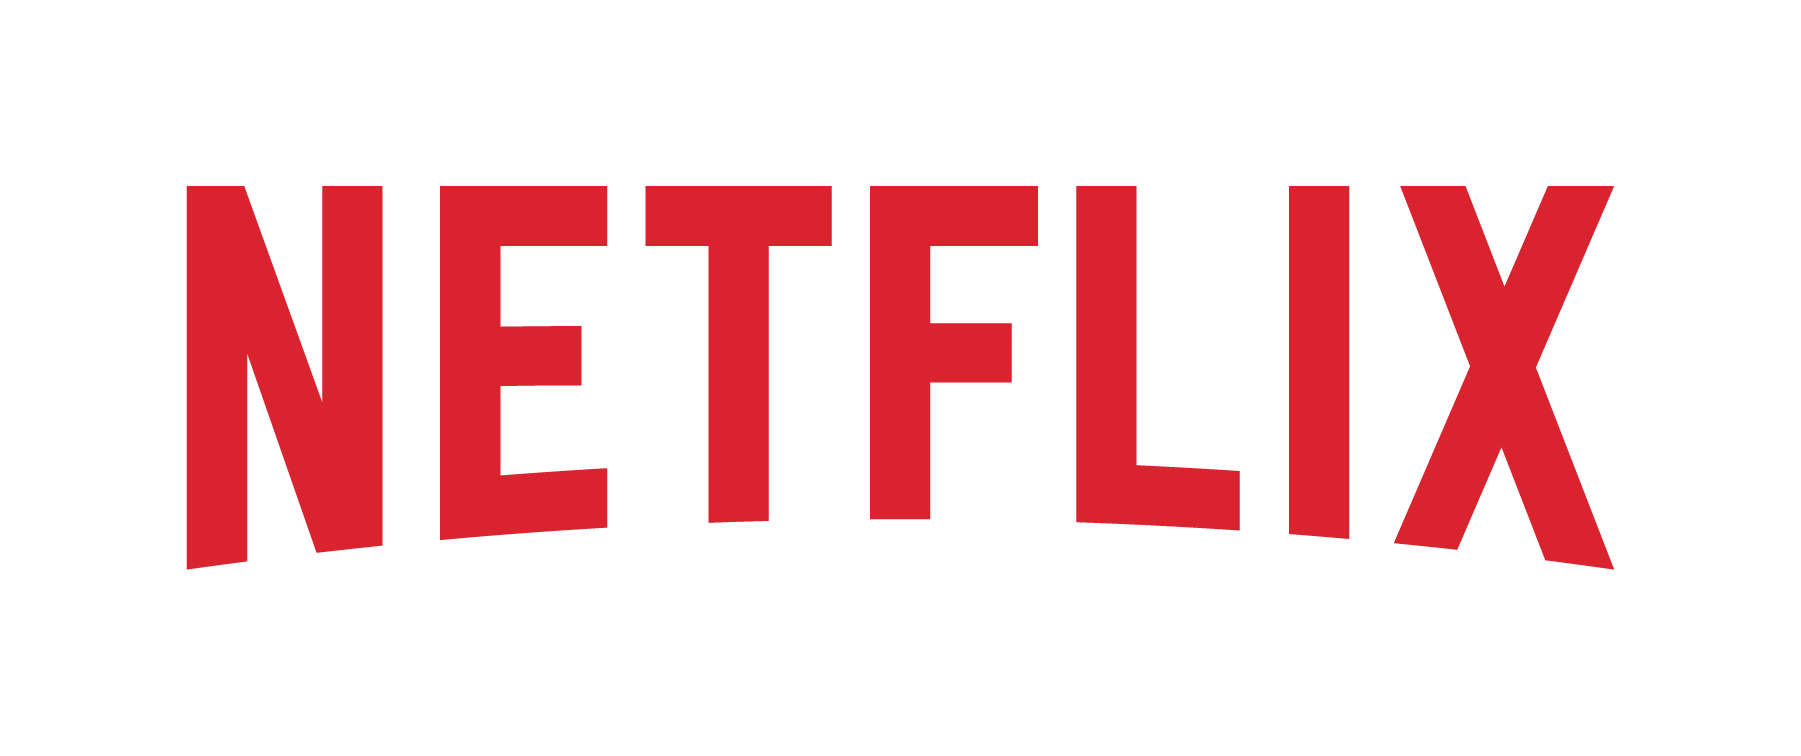

## Problem Statement

Analyze the data and generate that could help Netflix in deciding which type of shows/Movies to produce and how they can grow the business in different countries 

- Basic info about data
- Show_id : Unique ID for every Moves / TV show
- Type : Identifier - A Movie or TV show
- Title : Title of the Movie / TV show
- Director : Director of the movie
- Cast : Actors involved in the movie / show
- Country : Country where the movie / show was produced
- Date added : Date it was added on Nefilix
- Release year : Actual Release year of the movie / show 
- Rating : TV rating of the movie / show
- Duration : Total duration - in minutes or number of seasons 
- Listed in : Genre 
- Description : The summery description

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [2]:
data = pd.read_csv('Streaming_data.csv')

### Checking structure of the data 

In [3]:
df = pd.DataFrame(data)
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
# Columns of Dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
# Data types of columns present in dataset
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
# Getting the shape of dataset
print(f"----- The dataset contain {df.shape[0]} rows and have {df.shape[1]} columns -----")

----- The dataset contain 8807 rows and have 12 columns -----


### Checking if the dataset have null values and Dtype of columns 

In [8]:
# Getting some more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
# Calculating the null value percentage of each column
round( df.isnull().sum() / len(df)* 100 ,3) 

show_id          0.000
type             0.000
title            0.000
director        29.908
cast             9.368
country          9.436
date_added       0.114
release_year     0.000
rating           0.045
duration         0.034
listed_in        0.000
description      0.000
dtype: float64

### Checking anomaly in records of each column

In [10]:
# Creating a loop which will iterate the columns name and show the unique records and number of unique recods in each column
for i in df.columns:
    print(f"---------- {i} ----------")
    print(f"Number of unique values in {i} columns :{df[i].nunique()}")
    print(df[i].unique())
    print()

---------- show_id ----------
Number of unique values in show_id columns :8807
['s1' 's2' 's3' ... 's8805' 's8806' 's8807']

---------- type ----------
Number of unique values in type columns :2
['Movie' 'TV Show']

---------- title ----------
Number of unique values in title columns :8807
['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']

---------- director ----------
Number of unique values in director columns :4528
['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']

---------- cast ----------
Number of unique values in cast columns :7692
[nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, S

## 🔍📌 Observation

- 🔴 The dataset contains 8807 rows and 12 columns.
- 🔴 Out of 12 column only 1 column (release_year) have data type as integer other 11 columns have object (string) data type  
- 🔴 Columns such as Date added and release year should be in Datetime data type 
- 🔴 Columns like Cast,  Country and Listed in have more than one name of actor/actress, country and category embedded in single data cell. so for ease of analysis we need to get these embedded data in individual cells.
- 🔴 Cast, Director and country have many null values and Director column have highest 29% of its records as null.
- 🔴 Rating column have some records which are records of duration columns.


### Action needed
- Un-nest the records 
- Treat null values appropriatly
- Change data types 
- Data clearning for ease for  analysis

In [11]:
# Changing the data type
df['date_added'] = pd.to_datetime(df['date_added'])

 The median of difference of date added and release date : 0    0.0
dtype: float64 


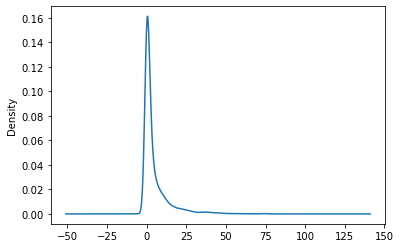

In [12]:
# Getting info about how much time it take to a movie to be added on Netflix
(df['date_added'].dt.year - df['release_year']).plot(kind='kde')
print(f" The median of difference of date added and release date : {(df['date_added'].dt.year - df['release_year']).mode()} ")

#### There is not major difference in the release year and date added

In [13]:
# Imputing null values for date added column using of release year col
# 
for i in df.loc[df['date_added'].isnull()]['release_year'].unique():
  imp=df.loc[df['release_year']==i]['date_added'].mode().values[0]
  df.loc[df['release_year']==i,'date_added']=df.loc[df['release_year']==i,'date_added'].fillna(imp)

In [14]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [15]:
# Getting rating with min in a dataframe 
rating_data = df.loc[df['rating'].str.contains('min') == True,'rating']

In [16]:
# Imputing null values of duration column using rating_data dataframe
df.loc[df['duration'].isnull(),'duration'] =  df.loc[df['duration'].isnull(),'duration'].fillna(rating_data)

In [17]:
# Removing the min records from rating columns 
# Replacing the NR values with more understandble Not rated label 

df.loc[df['rating'].str.contains("min") == True,'rating'] = "NR"

# Add Replace NR records with not rated values
df.loc[df['rating'] == 'NR','rating'] =  "Not Rated"

# Imputing the null values as not rated
df['rating'].fillna("Not Rated", inplace= True)

In [18]:
# Checking the left columns having null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

#### Director, cast  and country have a significant amount of null values

In [19]:
# Imputing null values for cast and director column

df['cast'].fillna(value='Unknown Artist',inplace=True)

df['director'].fillna(value='Unknown director',inplace=True)

In [20]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Artist,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown Artist,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### 🔍📌 Observation
- duration column contain min label with numeric values. For proper analysis we need to remove min from duration 

In [21]:
# Repmoving min from duration col
df['duration'] = df['duration'].str.replace(' min','')

In [22]:
# For ease of analysis we created a new column name new_duration   

df['new_duration'] = df['duration'].copy() # Making a copy of duration 
df.loc[df['new_duration'].str.contains('Season') == True,'new_duration'] = 0 # Marking 0 to the values which have season
df['new_duration']  = df['new_duration'].astype('int') # Chaning the data type of newly created column to integer.

In [23]:
# Statistical information about duration of movies 
df['new_duration'].describe()

count    8807.000000
mean       69.312252
std        51.519154
min         0.000000
25%         0.000000
50%        88.000000
75%       106.000000
max       312.000000
Name: new_duration, dtype: float64

In [24]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Artist,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown Artist,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0


<AxesSubplot:xlabel='new_duration', ylabel='Count'>

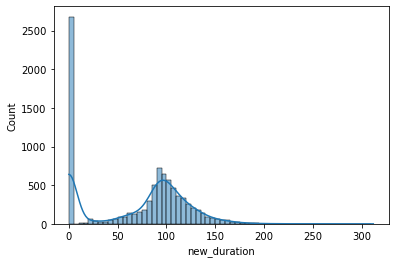

In [25]:
# Creating a histogram 

bins_ = [i for i in range(0,315,5)]
sns.histplot(data=df,x='new_duration',bins=bins_,kde= True)

#### The huge bar at 0 represent the TV show seasons, For duration of movies the histogram show a peak between 80 - 100 minutes

In [26]:
# Creating label for better understanding of the range

bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df['new_duration'] = pd.cut(df['new_duration'],bins=bins1,labels=labels1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Artist,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",80-100
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",<1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,<1
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown Artist,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",<1
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,<1


In [27]:
# Merging the duration and new_duration columns
df.loc[~df['duration'].str.contains('Season'),'duration']=df.loc[~df['duration'].str.contains('Season'),'new_duration']
df.drop(['new_duration'],axis=1,inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Artist,United States,2021-09-25,2020,PG-13,80-100,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown Artist,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [28]:
# Creating new columns as month added, week_added and year added for checking any seasonality in the data.

df['month_added'] = df['date_added'].dt.month
df['week_added'] = df['date_added'].dt.isocalendar().week
df['year_added'] = df['date_added'].dt.year

In [29]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,week_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Artist,United States,2021-09-25,2020,PG-13,80-100,Documentaries,"As her father nears the end of his life, filmm...",9,38,2021
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,38,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,38,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown Artist,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,38,2021
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,38,2021


#### Unnesting the records

For ease in analysis we will create a function which will return a dataframe of unnested data

In [30]:
def unnest_records(column_name,name_of_unnested_col):
    '''
    Inputs- column_name = enter the name of the nested column to unnest (in string data type)
            name_of_unnested_col = enter the name which you want to get as the name of the unnested column in the output.
    
    Output - Return a dataframe with index as title (title of movies/shows) and unnested values of columns 
    
    '''
    split_to_list = df[column_name].apply(lambda x : str(x).split(", ")).to_list()
    split_to_list = pd.DataFrame(split_to_list,index=df['title'])
    stack_to_list = split_to_list.stack()
    stack_to_dataframe = pd.DataFrame(stack_to_list.reset_index())
    rename_cols = stack_to_dataframe.rename(columns={0 : name_of_unnested_col})
    final_df = rename_cols.drop(['level_1'],axis=1)
    return final_df


In [31]:
# Unnesting cast column and naming it artist (because actually actors/actresses are artists and artiest word represent both genders)
unnested_cast = unnest_records(column_name='cast',name_of_unnested_col='Artists')
unnested_cast

,title,Artists
0,Dick Johnson Is Dead,Unknown Artist
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [32]:
# Unnesting director col
unnested_directors = unnest_records(column_name='director',name_of_unnested_col='directors')
unnested_directors

,title,directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Unknown director
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Unknown director
4,Kota Factory,Unknown director
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,Unknown director
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [33]:
# Unnesting country col
unnested_country = unnest_records(column_name='country',name_of_unnested_col='countries')
unnested_country

,title,countries
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,nan
10842,Zombieland,United States
10843,Zoom,United States


In [34]:
# Unnesting listed_in columns and naming it as category 
unnest_category = unnest_records(column_name='listed_in',name_of_unnested_col='category')
unnest_category

,title,category
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [35]:
# Merging unnested dataframes with df 
df_new1 = df.merge(unnested_directors,on=['title'],how='inner')

df_new2 = df_new1.merge(unnested_cast,on=['title'],how ='inner')

df_new3 = df_new2.merge(unnest_category,on=['title'],how='inner')

df_final1 = df_new3.merge(unnested_country,on=['title'],how='inner')

In [36]:
# Droping the nestind columns from df
df_final1.drop(columns=['director','cast','country','listed_in'],axis=1,inplace = True)

In [37]:
df_final1.head()

,show_id,type,title,date_added,release_year,rating,duration,description,month_added,week_added,year_added,directors,Artists,category,countries
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,80-100,"As her father nears the end of his life, filmm...",9,38,2021,Kirsten Johnson,Unknown Artist,Documentaries,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,38,2021,Unknown director,Ama Qamata,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,38,2021,Unknown director,Ama Qamata,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,38,2021,Unknown director,Ama Qamata,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,38,2021,Unknown director,Khosi Ngema,International TV Shows,South Africa


In [38]:
df_final1['countries'].value_counts()

United States     59349
India             22814
United Kingdom    12945
nan               11897
Japan              8679
                  ...  
Palestine             2
Kazakhstan            1
Nicaragua             1
United States,        1
Uganda                1
Name: countries, Length: 128, dtype: int64

#### There are many nan values in country col

In [41]:
# Imputing nan values using directors col
# Logic
# when we have a director whose other movies have a country given.So below piece of code just checks the mode of 
#country for the director
# and imputes in place of nulls the corresponding mode

for i in df_final1[df_final1['countries'] == 'nan']['directors'].unique():
  if i in df_final1[df_final1['countries'] == 'nan']['directors'].unique():
    imp=df_final1[df_final1['directors']==i]['countries'].mode().values[0]
    df_final1.loc[df_final1['directors']==i,'countries']=df_final1.loc[df_final1['directors']==i,'countries'].replace(imp)

In [42]:
df_final1['countries'].value_counts()

United States     45669
India             23420
United Kingdom    15800
Japan             11163
Canada             9723
                  ...  
Palestine             2
Kazakhstan            1
Nicaragua             1
United States,        1
Uganda                1
Name: countries, Length: 128, dtype: int64

Now there are no nan values 

In [43]:
df_final1.head()

,show_id,type,title,date_added,release_year,rating,duration,description,month_added,week_added,year_added,directors,Artists,category,countries
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,80-100,"As her father nears the end of his life, filmm...",9,38,2021,Kirsten Johnson,Unknown Artist,Documentaries,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,38,2021,Unknown director,Ama Qamata,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,38,2021,Unknown director,Ama Qamata,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,38,2021,Unknown director,Ama Qamata,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,38,2021,Unknown director,Khosi Ngema,International TV Shows,South Africa


This is out final dataframe after data cleaning, Know we will start our analysis part 

###  Analysis

In [44]:
#number of distinct titles on the basis of genre
df_final1.groupby(['category']).agg({"title":"nunique"}).reset_index().head()

,category,title
0,Action & Adventure,859
1,Anime Features,71
2,Anime Series,176
3,British TV Shows,253
4,Children & Family Movies,641


In [45]:
df_gen = df_final1.groupby(['category']).agg({"title":"nunique"}).reset_index()
df_gen = df_gen.sort_values(by=['title'],ascending= False)[:15]
df_gen

,category,title
16,International Movies,2752
12,Dramas,2427
7,Comedies,1674
17,International TV Shows,1351
10,Documentaries,869
0,Action & Adventure,859
34,TV Dramas,763
15,Independent Movies,756
4,Children & Family Movies,641
24,Romantic Movies,616


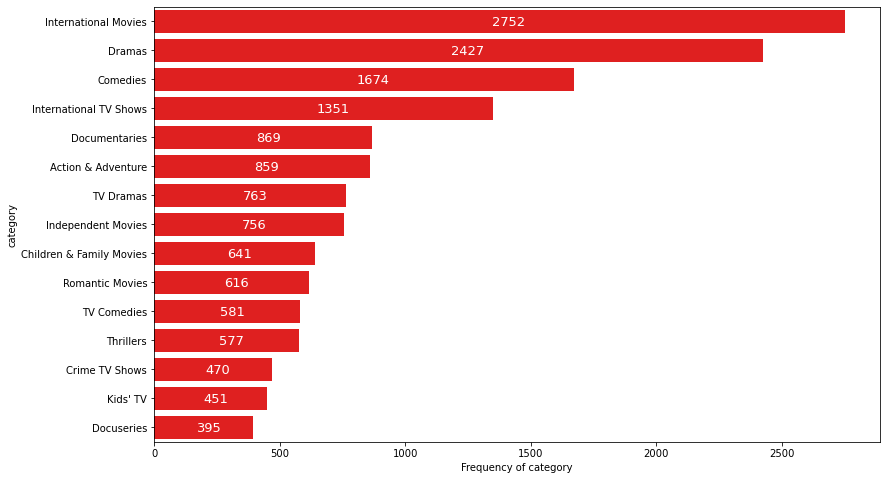

In [63]:
plt.figure(figsize=(13,8))
dia = sns.barplot(data=df_gen,x='title',y='category',color='red')
plt.xlabel('Frequency of category')
plt.ylabel('category')
# Annotation code
add = 0
for i in df_gen['title']:
    dia.text(x=(i/2)-30,y=.15 + add,s=str(i),c='white',fontsize=13)
    add = 1 + add

### Insight 
- International Movies, Dramas, Comedies, International TV shows and Documentaries are top 5 category in demand 

In [47]:
#number of distinct titles on the basis of type
df_type = df_final1.groupby(['type']).agg({"title":"nunique"}).reset_index()
df_type

,type,title
0,Movie,6131
1,TV Show,2676


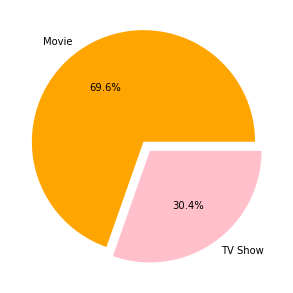

In [48]:
plt.figure(figsize=(5,8))
plt.pie(df_type['title'],explode=(0.05,0.05), labels=df_type['type'],colors=['orange','pink'],autopct='%.1f%%')
plt.show()

### Insight 
- Out of total the data contain 70% movies and 30% TV shows 

In [49]:
#number of distinct titles on the basis of country
df_final1.groupby(['countries']).agg({"title":"nunique"}).reset_index()

,countries,title
0,,2
1,Afghanistan,1
2,Albania,1
3,Algeria,4
4,Angola,1
...,...,...
123,Venezuela,4
124,Vietnam,7
125,West Germany,5
126,Zimbabwe,3


In [50]:
df_final1['countries'] = df_final1['countries'].str.replace(',', '')
df_final1.head()

,show_id,type,title,date_added,release_year,rating,duration,description,month_added,week_added,year_added,directors,Artists,category,countries
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,80-100,"As her father nears the end of his life, filmm...",9,38,2021,Kirsten Johnson,Unknown Artist,Documentaries,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,38,2021,Unknown director,Ama Qamata,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,38,2021,Unknown director,Ama Qamata,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,38,2021,Unknown director,Ama Qamata,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,38,2021,Unknown director,Khosi Ngema,International TV Shows,South Africa


In [51]:
#number of distinct titles on the basis of country
df_country = df_final1.groupby(['countries']).agg({"title":"nunique"}).reset_index()
df_country = df_country.sort_values(by=['title'],ascending=False)[:5]
df_country

,countries,title
116,United States,2723
46,India,1111
115,United Kingdom,1001
21,Canada,531
54,Japan,495


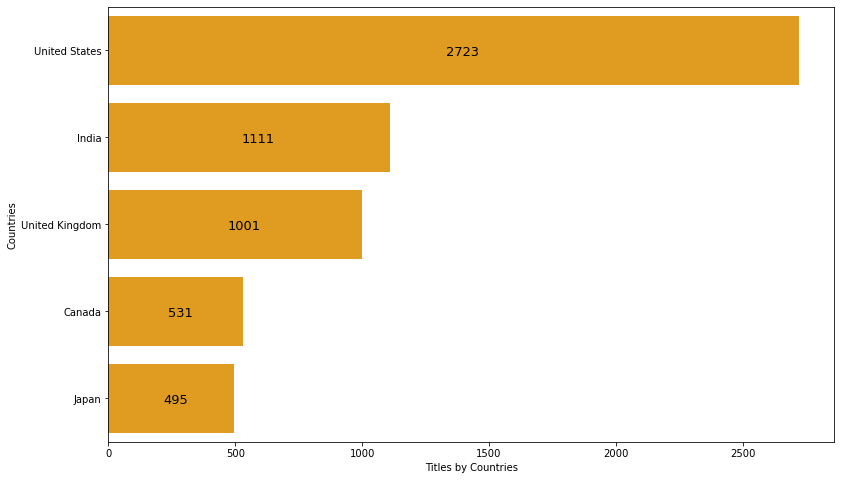

In [52]:
plt.figure(figsize=(13,8))
dia = sns.barplot(data=df_country,x='title',y='countries',color='orange')
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
# Annotation code
add = 0
for i in df_country['title']:
    dia.text(x=(i/2)-30,y=.06 + add,s=str(i),c='black',fontsize=13)
    add = 1 + add

#### Most of the content on netflix is centered around United states, after USA surprisingly India comes on second

In [53]:
#number of distinct titles on the basis of rating
df_rating = df_final1.groupby(['rating']).agg({"title":"nunique"}).reset_index()
df_rating = df_rating.sort_values(by=['title'],ascending=False)
df_rating

,rating,title
8,TV-MA,3207
6,TV-14,2160
9,TV-PG,863
5,R,799
4,PG-13,490
11,TV-Y7,334
10,TV-Y,307
3,PG,287
7,TV-G,220
2,Not Rated,87


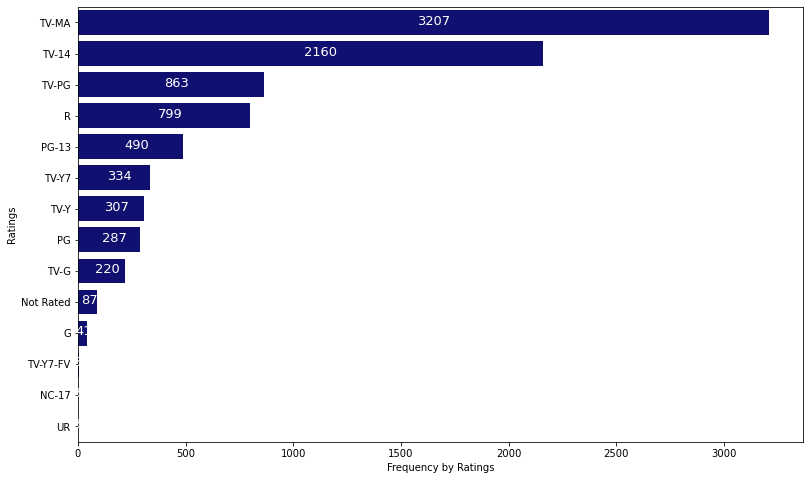

In [54]:
plt.figure(figsize=(13,8))
dia = sns.barplot(data=df_rating,x='title',y='rating',color='navy')
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
# ---------------------------------------------------------------------
# Annotation code
add = 0
for i in df_rating['title']:
    dia.text(x=(i/2)-30,y=.06 + add,s=str(i),c='white',fontsize=13)
    add = 1 + add

### Insight
- Most of the highly rated content on Netflix is intended for Mature Audiences, R Rated, content not intended for audience under 14 and those which require Parental Guidance

In [55]:
#number of distinct titles on the basis of duration
df_duration = df_final1.groupby(['duration']).agg({"title":"nunique"}).reset_index()
df_duration = df_duration.sort_values(by='title',ascending=False)
df_duration

,duration,title
20,80-100,2222
0,1 Season,1793
3,100-120,1672
6,120-150,897
16,50-80,808
11,2 Seasons,425
1,1-50,287
9,150-200,226
13,3 Seasons,199
14,4 Seasons,95


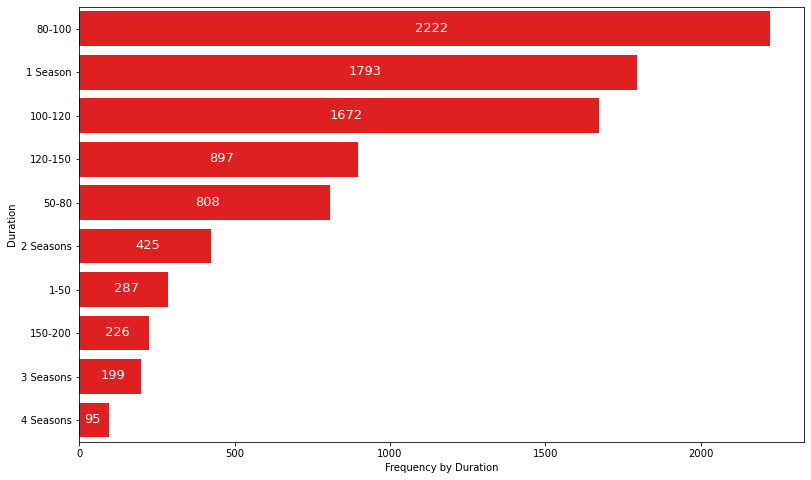

In [56]:
df_duration = df_duration[:10]
plt.figure(figsize=(13,8))
dia = sns.barplot(data=df_duration,x='title',y='duration',color='red')
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')

# Annotation code
add = 0
for i in df_duration['title']:
    dia.text(x=(i/2)-30,y=.06 + add,s=str(i),c='white',fontsize=13)
    add = 1 + add

### Insight
- The duration of Most Watched content in our whole data is 80-100 mins.These must be movies and Shows having only 1 Season.

In [57]:
#number of distinct titles on the basis of Actors
df_actors = df_final1.groupby(['Artists']).agg({"title":"nunique"}).reset_index()
df_actors = df_actors.sort_values(by='title',ascending=False)
df_actors 

,Artists,title
34214,Unknown Artist,825
2833,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
24215,Naseeruddin Shah,32
...,...,...
14221,Jamie Lee,1
14219,Jamie Kenna,1
14218,Jamie Kaler,1
14217,Jamie Johnston,1


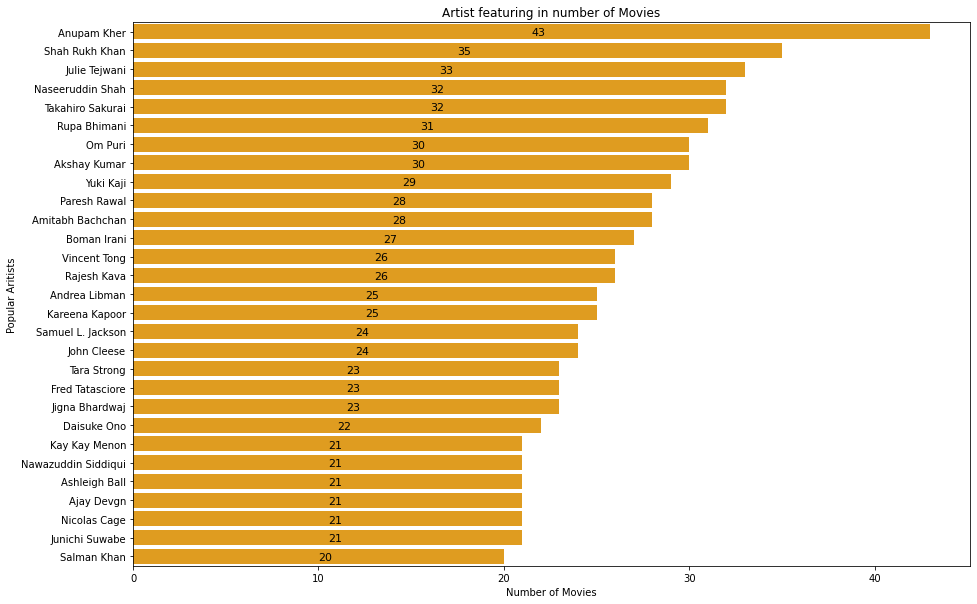

In [74]:
df_actors=df_actors[:31]
df_actors=df_actors[df_actors['Artists']!='Unknown Artist']

plt.figure(figsize=(15,10))
dia = sns.barplot(data=df_actors,x='title',y='Artists',color='orange')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Aritists')
plt.title('Artist featuring in number of Movies')

# Annotation code
add = 0
for i in df_actors['title']:
    dia.text(x=i/2,y=0.2 + add,s=str(i),color='black',fontsize=11)
    add = 1 + add

In [75]:
df_actors[::-1]

,Artists,title
29386,Salman Khan,20
16823,Junichi Suwabe,21
24752,Nicolas Cage,21
766,Ajay Devgn,21
3214,Ashleigh Ball,21
24435,Nawazuddin Siddiqui,21
17584,Kay Kay Menon,21
7271,Daisuke Ono,22
15232,Jigna Bhardwaj,23
10901,Fred Tatasciore,23


### Insight
- Anupam Kher,SRK,Julie Tejwani, Naseeruddin Shah and Takahiro Sakurai occupy the top stop in Most Watched content.

In [76]:
#number of distinct titles on the basis of Actors
df_final1.groupby(['directors']).agg({"title":"nunique"}).reset_index()

,directors,title
0,A. L. Vijay,2
1,A. Raajdheep,1
2,A. Salaam,1
3,A.R. Murugadoss,2
4,Aadish Keluskar,1
...,...,...
4989,Éric Warin,1
4990,Ísold Uggadóttir,1
4991,Óskar Thór Axelsson,1
4992,Ömer Faruk Sorak,3


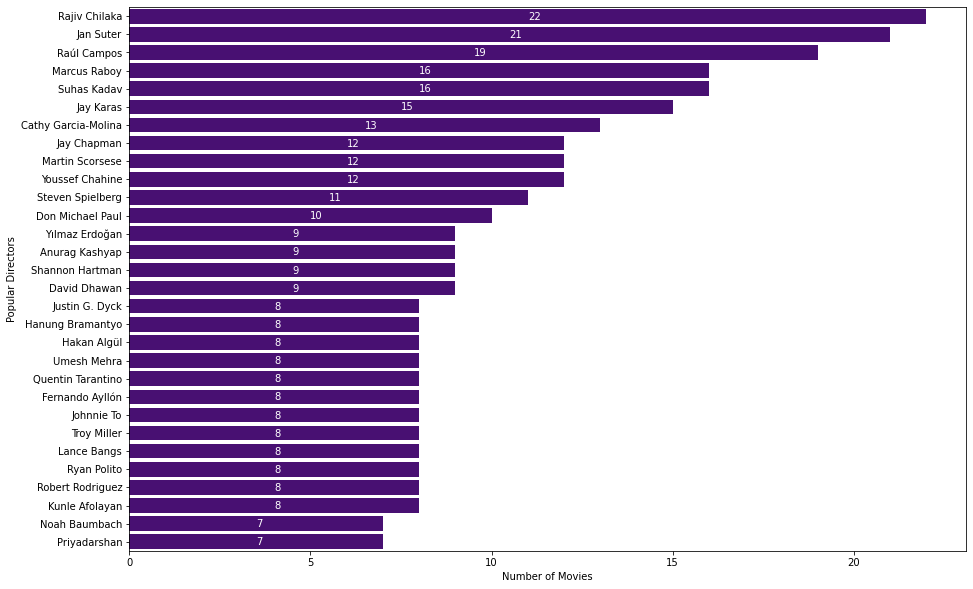

In [87]:
df_directors=df_final1.groupby(['directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['directors']!='Unknown director']

plt.figure(figsize=(15,10))
dia = sns.barplot(data=df_directors,x='title',y='directors',color='indigo')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')

# Annotation code 
add = 0
for i in df_directors['title']:
    dia.text(x=i/2,y=0.2 + add,s=str(i),color= 'white',fontsize=10)
    add = 1 + add

###  Insight
- Rajiv Chilaka, Jan Suter and Raul Campos are the most popular directors across Netflix

In [106]:
#number of distinct titles on the basis of year
df_year = df_final1.groupby(['year_added']).agg({"title":"nunique"}).reset_index()
df_year

,year_added,title
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,432
9,2017,1189


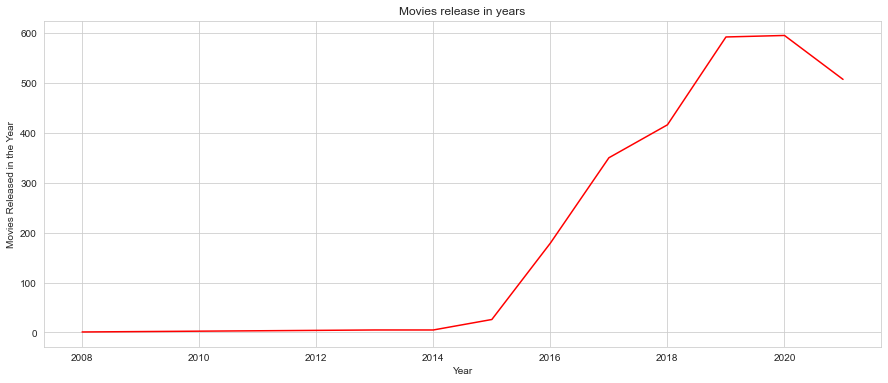

In [263]:
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")

sns.lineplot(data=df_year, x='year_added', y='title',color='r')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.title('Movies release in years')
plt.show()

### Insight
- The Amount of Content across Netflix has increased from 2008 continuously till 2019. Then started decreasing from here(probably due to Covid)

In [111]:
df_final1

,show_id,type,title,date_added,release_year,rating,duration,description,month_added,week_added,year_added,directors,Artists,category,countries
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,80-100,"As her father nears the end of his life, filmm...",9,38,2021,Kirsten Johnson,Unknown Artist,Documentaries,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,38,2021,Unknown director,Ama Qamata,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,38,2021,Unknown director,Ama Qamata,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,38,2021,Unknown director,Ama Qamata,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,38,2021,Unknown director,Khosi Ngema,International TV Shows,South Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,100-120,A scrappy but poor boy worms his way into a ty...,3,9,2019,Mozez Singh,Anita Shabdish,International Movies,India
201987,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,100-120,A scrappy but poor boy worms his way into a ty...,3,9,2019,Mozez Singh,Anita Shabdish,Music & Musicals,India
201988,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,100-120,A scrappy but poor boy worms his way into a ty...,3,9,2019,Mozez Singh,Chittaranjan Tripathy,Dramas,India
201989,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,100-120,A scrappy but poor boy worms his way into a ty...,3,9,2019,Mozez Singh,Chittaranjan Tripathy,International Movies,India


In [112]:
#number of distinct titles on the basis of week
df_week =  df_final1.groupby(['week_added']).agg({"title":"nunique"}).reset_index()

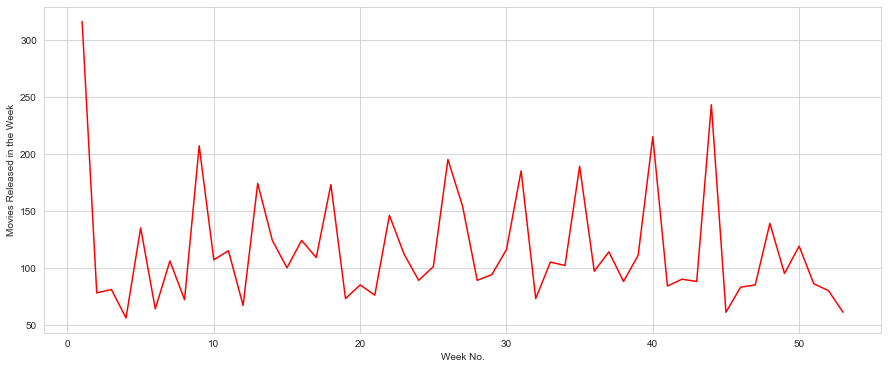

In [262]:
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")

sns.lineplot(data=df_week, x='week_added', y='title',color='r')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

### Insight
- Most of the Content across Netflix is added in the first week of the year and it follows a bit of a cyclical pattern

In [119]:
#number of distinct titles on the basis of week
df_month = df_final1.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
df_month

,month_added,title
0,1,738
1,2,563
2,3,743
3,4,764
4,5,632
5,6,728
6,7,827
7,8,756
8,9,772
9,10,762


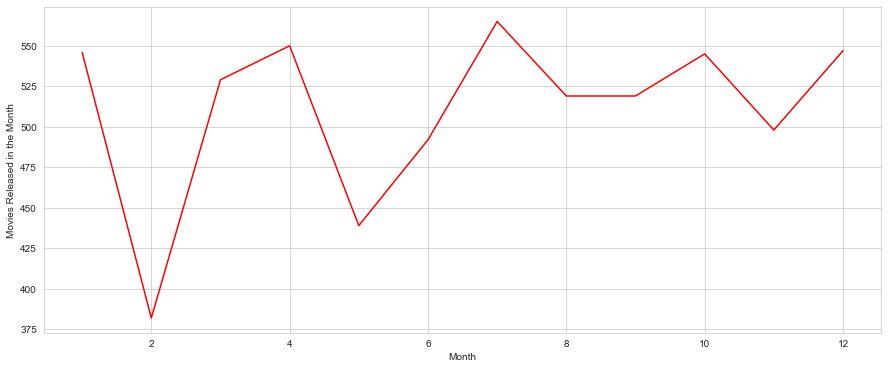

In [261]:
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
sns.lineplot(data=df_month, x='month_added', y='title',color='r')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

### Insight
- Most of the content is added in the first and last months across Netflix(reinstating what we observed for first week in above plot

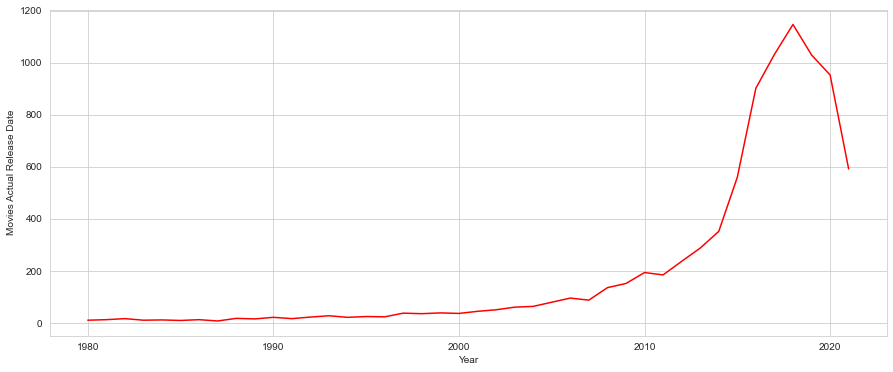

In [260]:
df_release_year=df_final1[df_final1['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
sns.lineplot(data=df_release_year, x='release_year', y='title',color='r')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

### Insight
- Net content release which are later uploaded to Netflix has increased since 1980 till 2020 though later reduced certainly due to COVID-19

#### Univariate Analysis separately for shows and movies
---

In [150]:
# Separating movies and TV show and creating different dataframe
df_shows=df_final1[df_final1['type']=='TV Show']
df_movies=df_final1[df_final1['type']=='Movie']


In [155]:
df_genre=df_shows.groupby(['category']).agg({"title":"nunique"}).reset_index()
df_genre = df_genre.sort_values(by=['title'],ascending=False)[:15]

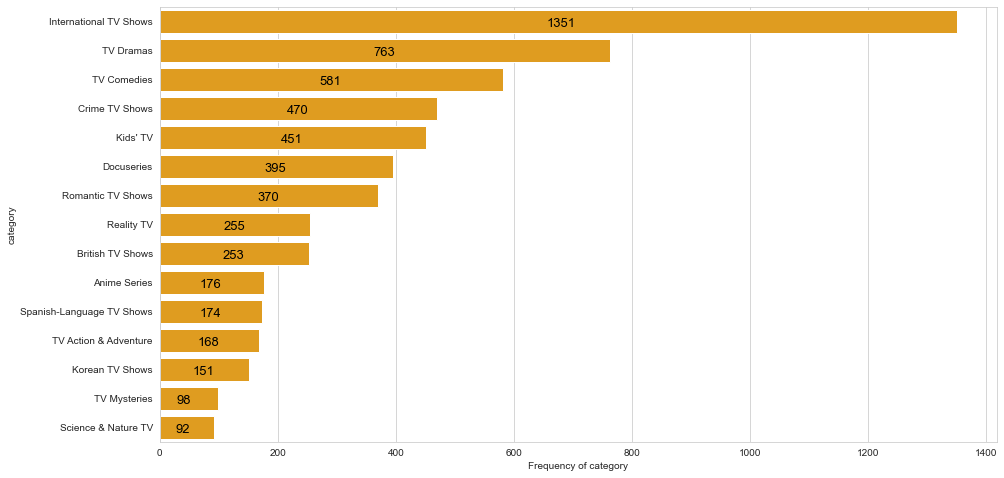

In [162]:
plt.figure(figsize=(15,8))

dia = sns.barplot(data=df_genre,x='title',y='category',color='orange')
plt.xlabel('Frequency of category')
plt.ylabel('category')

# Annotation code 
ad = 0
for i in df_genre['title']:
    dia.text(x=i/2-20,y=0.2 + ad,s=str(i),color='black',fontsize=13)
    ad = 1 + ad

### Insight
- International TV Shows, Dramas and Comedy Genres are popular across TV Shows in Netflix

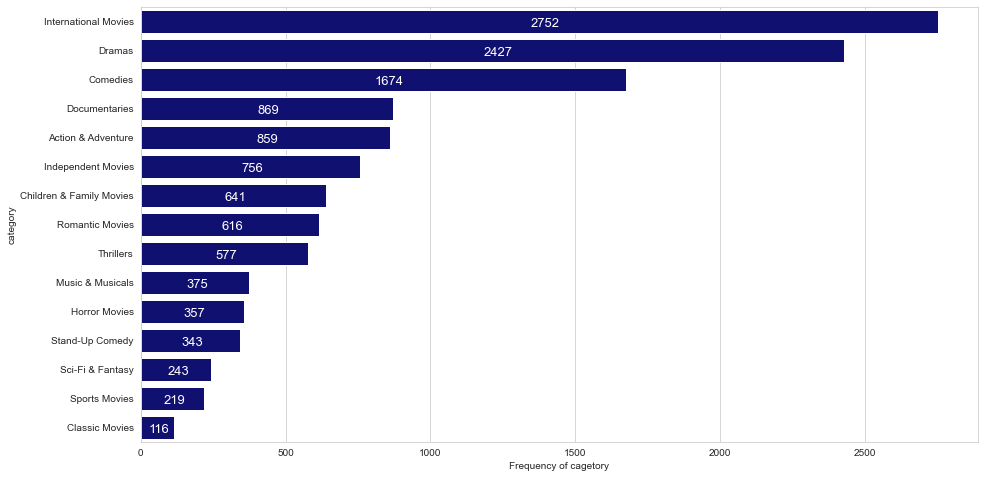

In [170]:
df_genre=df_movies.groupby(['category']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
dia = sns.barplot(data=df_genre,x='title',y='category',color='navy')
plt.xlabel('Frequency of cagetory')
plt.ylabel('category')
ad = 0
for i in df_genre['title']:
    dia.text(x=i/2-30,y=0.2 + ad,s=str(i),color='white',fontsize=13)
    ad = 1 + ad

### Insight
- International Movies, Dramas and Comedy Genres are popular followed by Documentaries across Movies on Netflix

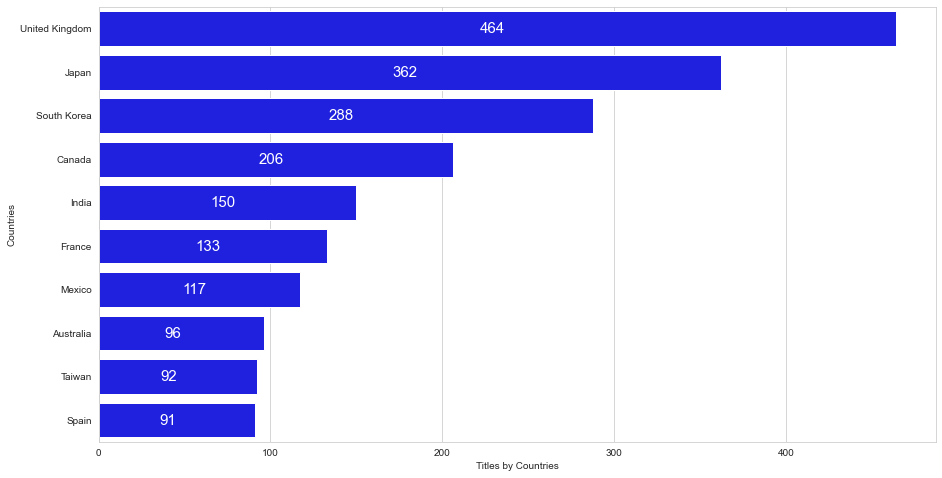

In [177]:
df_country=df_shows.groupby(['countries']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
dia = sns.barplot(data=df_country,x='title',y='countries',color='blue')

plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
ad = 0
for i in df_country['title']:
    dia.text(x=i/2-10,y=0.1 + ad,s=str(i),color='white',fontsize=15)
    ad = 1 + ad

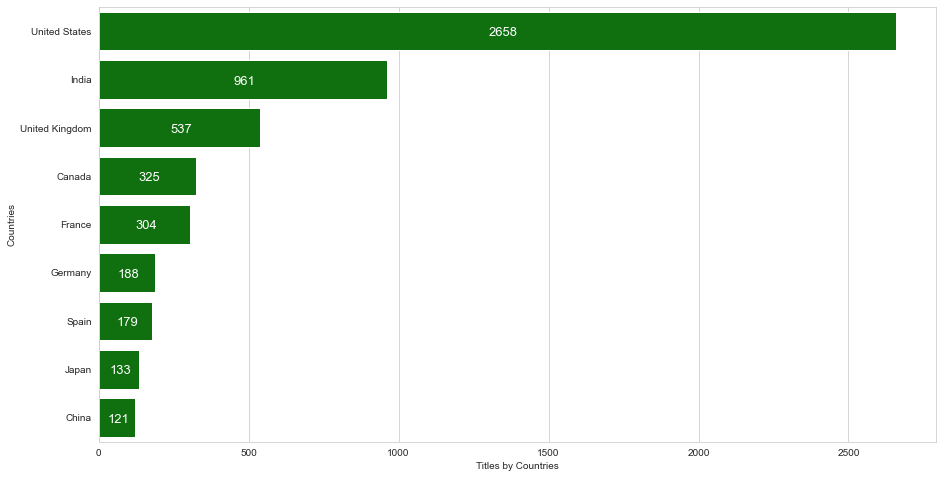

In [196]:
df_country=df_movies.groupby(['countries']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_country = df_country.loc[df_country['countries'] != 'nan']

plt.figure(figsize=(15,8))
dia = sns.barplot(data=df_country,x='title', y='countries', color= 'green')
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
ad = 0
for i in df_country['title']:
    dia.text(x=(i/2)-30,y=0.1 + ad,s=str(i),color='white',fontsize=13)
    ad = 1 + ad

### Insight
- United States is leading across both TV Shows and Movies, UK also provides great content across TV Shows and Movies. Surprisingly India is much more prevalent in Movies as compared TV Shows. 

- Moreover the number of Movies created in India outweigh the sum of TV Shows and Movies across UK since India was rated as second in net sum of whole content across Netflix.

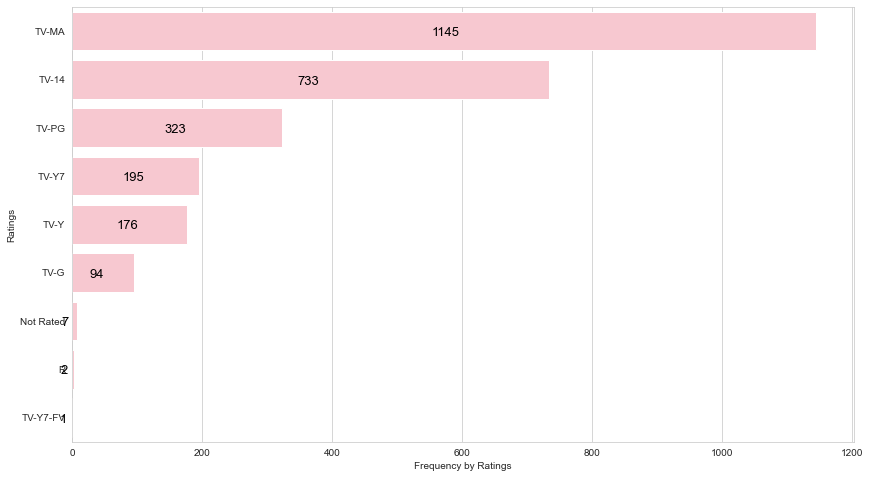

In [202]:
df_rating=df_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(14,8))

dia = sns.barplot(data=df_rating,x='title',y='rating',color='pink')
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
ad = 0
for i in df_rating['title']:
    dia.text(x=(i/2)-20,y=0.1 + ad,s=str(i),color='black',fontsize=13)
    ad = 1 + ad

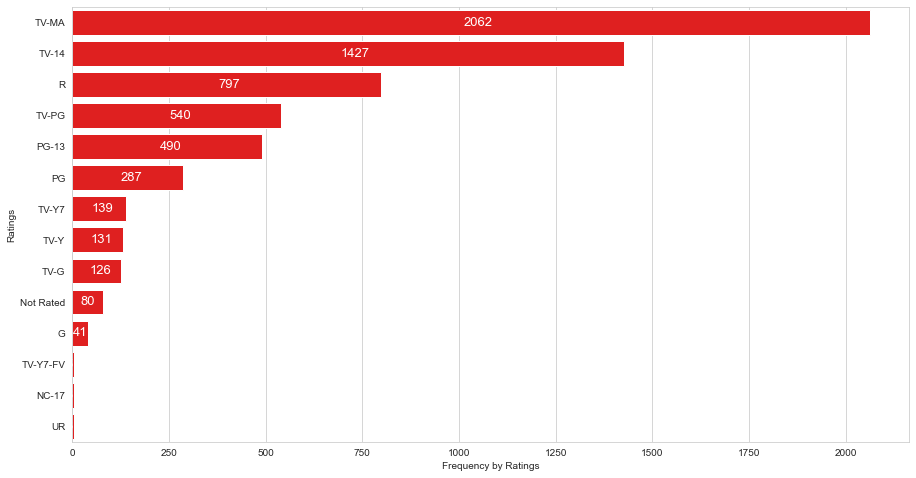

In [206]:
df_rating=df_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
dia = sns.barplot(data=df_rating,x='title',y='rating',color='red')
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
ad = 0
for i in df_rating['title']:
    dia.text(x=(i/2)-20,y=0.1 + ad,s=str(i),color='white',fontsize=13)
    ad = 1 + ad

### Insight
- So it seems natural to conclude that the popular ratings across Netflix includes Mature Audiences and those appropriate for over 14/over 17 ages.
Moreover there are no TV Shows having a rating of R

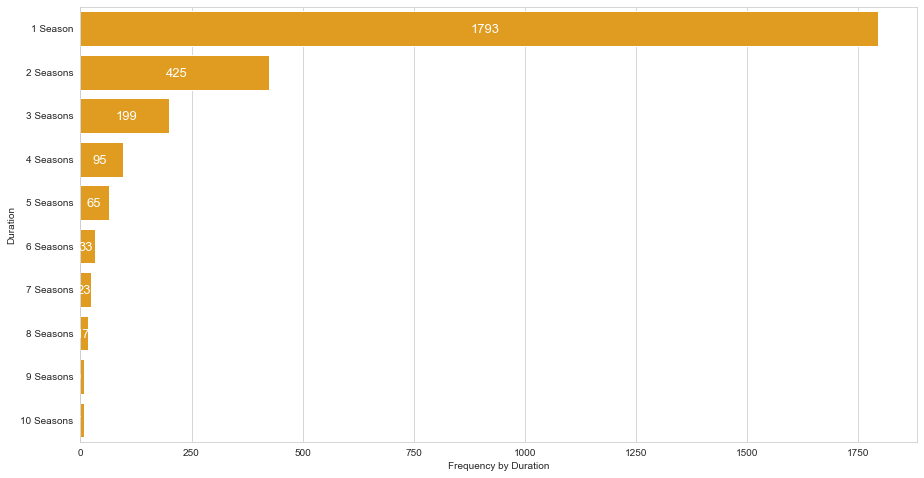

In [209]:
df_duration=df_shows.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
dia = sns.barplot(data=df_duration,x='title',y='duration',color='orange')
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')

ad = 0
for i in df_duration['title']:
    dia.text(x=(i/2)-20,y=0.1 + ad,s=str(i),color='white',fontsize=13)
    ad = 1 + ad

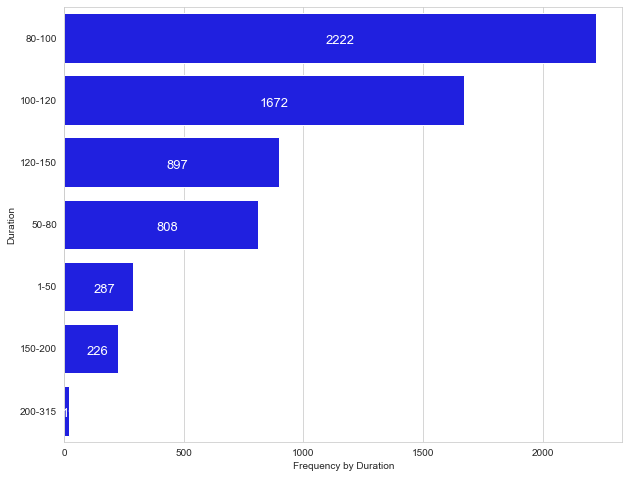

In [225]:
df_duration=df_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(10,8))
dia = sns.barplot(data=df_duration,x='title',y='duration',color='blue')
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
ad = 0
for i in df_duration['title']:
    dia.text(x=(i/2)-20,y=0.1 + ad,s=str(i),color='white',fontsize=13)
    ad = 1 + ad

### Insight

- Across movies 80-100,100-120 and 120-150 is the ranges of minutes for which most movies lie. So quite possibly 80-150 mins is the sweet spot we would be wanting for movies.

In [117]:
df_final1.columns

Index(['show_id', 'type', 'title', 'date_added', 'release_year', 'rating',
       'duration', 'description', 'month_added', 'week_added', 'year_added',
       'directors', 'Artists', 'category', 'countries'],
      dtype='object')

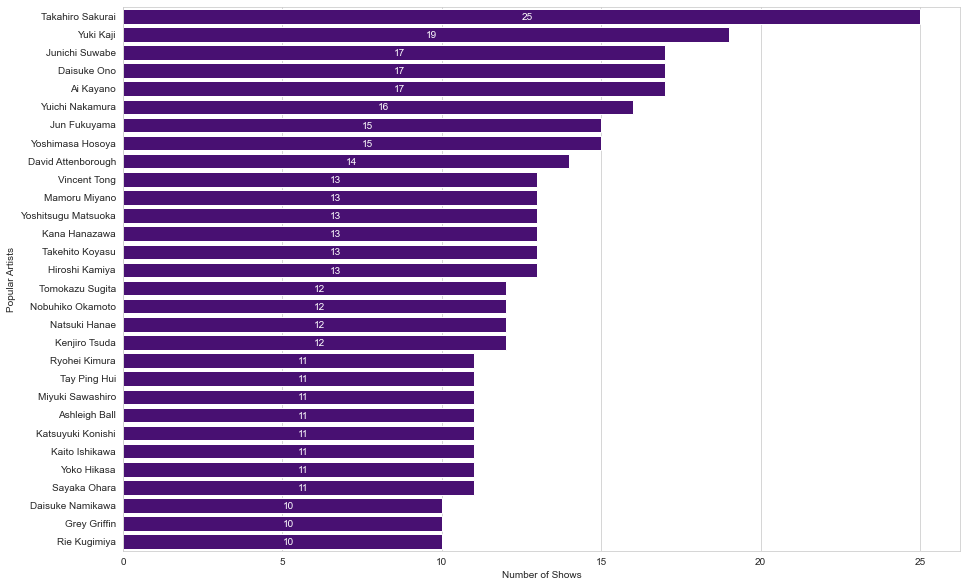

In [223]:
df_actors=df_shows.groupby(['Artists']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['Artists']!='Unknown Artist']
plt.figure(figsize=(15,10))
dia = sns.barplot(data=df_actors,x='title',y='Artists',color='indigo')
plt.xlabel('Number of Shows')
plt.ylabel('Popular Artists')
# Annotation code
ad = 0
for i in df_actors['title']:
    dia.text(x=i/2,y=0.2+ad,s=str(i),color='white',fontsize=10)
    ad = 1 + ad

### Insight 
- For Netfilx in TV shows category Artists like - Takahiro Sakurai, Yuki Kaji appear frequently in TV show as compared to other artists. 

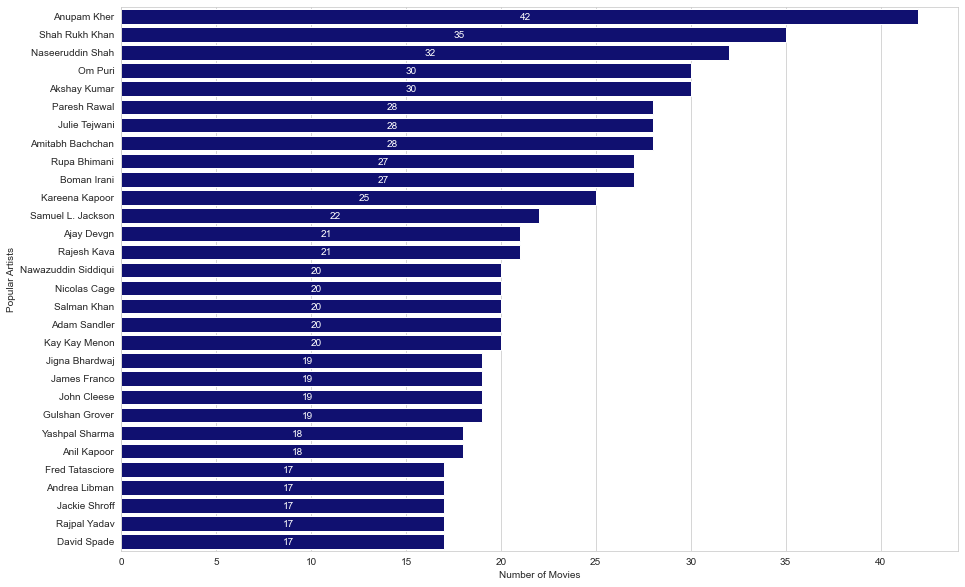

In [228]:
df_actors=df_movies.groupby(['Artists']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['Artists']!='Unknown Artist']
plt.figure(figsize=(15,10))
dia = sns.barplot(data=df_actors,x='title',y='Artists',color='navy')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Artists')

# Annotation code 
ad = 0
for i in df_actors['title']:
    dia.text(x=i/2,y=0.2+ad,s=str(i),color='white',fontsize=10)
    ad = 1 + ad

### Insight
- Our bollywood actors such as Anupam Kher, SRK, Naseeruddin Shah are very much popular acrossmovies on Netflix

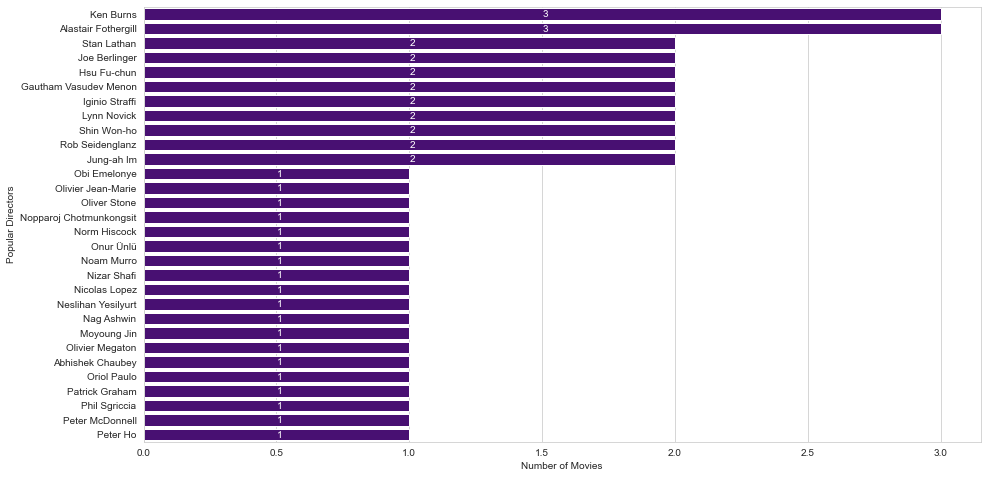

In [231]:
df_directors=df_shows.groupby(['directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['directors']!='Unknown director']
plt.figure(figsize=(15,8))
dia = sns.barplot(data=df_directors,x='title',y='directors',color='indigo')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
# Annotation code 
ad = 0
for i in df_directors['title']:
    dia.text(x=i/2,y=0.2+ad,s=str(i),color='white',fontsize=10)
    ad = 1 + ad

- Ken Burns, Alastair Fothergill, Stan Lathan, Joe Barlinger are popular directors across TV Shows on Netflix

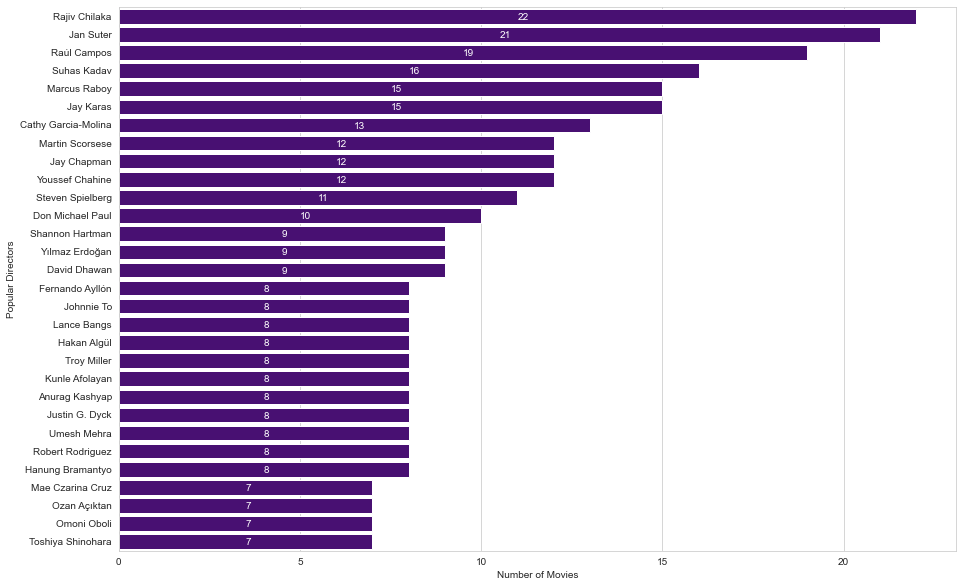

In [233]:
df_directors=df_movies.groupby(['directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['directors']!='Unknown director']
plt.figure(figsize=(15,10))
dia = sns.barplot(data=df_directors,x='title',y='directors',color='indigo')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
# Annotation code 
ad = 0
for i in df_directors['title']:
    dia.text(x=i/2,y=0.2+ad,s=str(i),color='white',fontsize=10)
    ad = 1 + ad

- Rajiv Chilka, Jan Suter, Raul Campos, Suhas Kadav are popular directors across movies

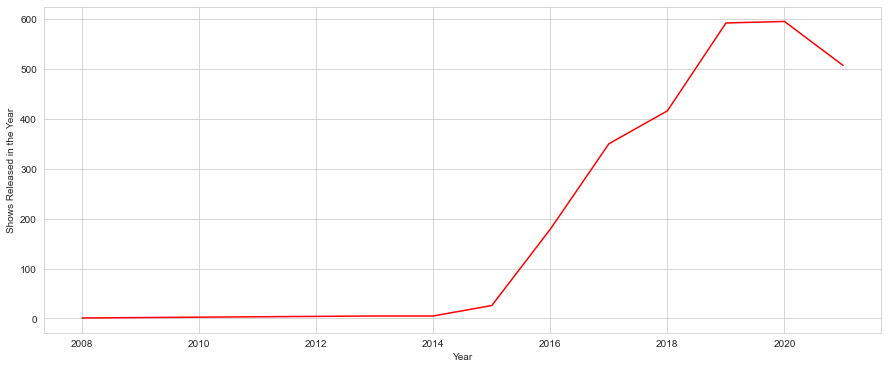

In [259]:
df_year=df_shows.groupby(['year_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,6))
sns.lineplot(data=df_year, x='year_added', y='title',color='r')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

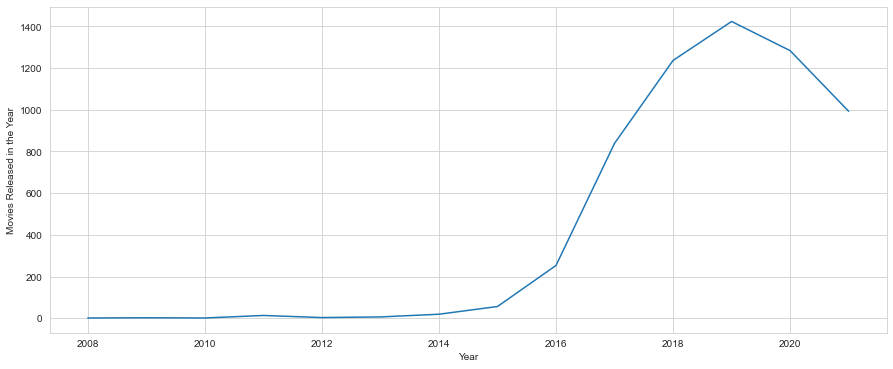

In [258]:
df_year=df_movies.groupby(['year_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,6))
sns.lineplot(data=df_year, x='year_added', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

- Till 2019, overall content across Netflix was increasing but due to Covid in 2020, though TV Shows didn't take a hit then Movies did take a hit. Well later in 2021, content across both was reduced significantly

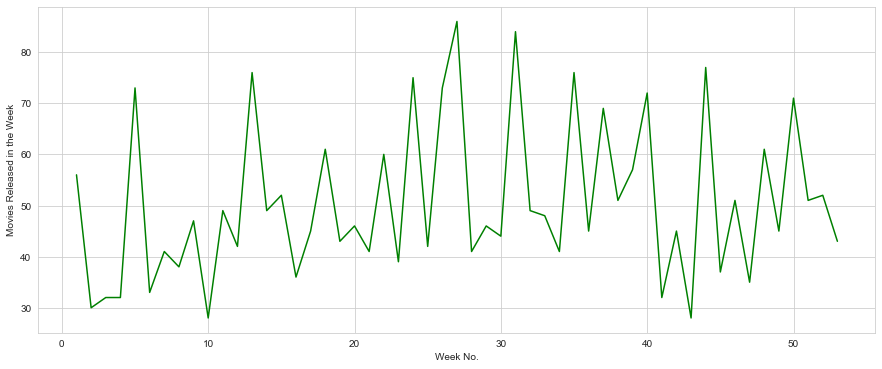

In [252]:
df_week=df_shows.groupby(['week_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,6))
sns.lineplot(data=df_week, x='week_added', y='title',color='green')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

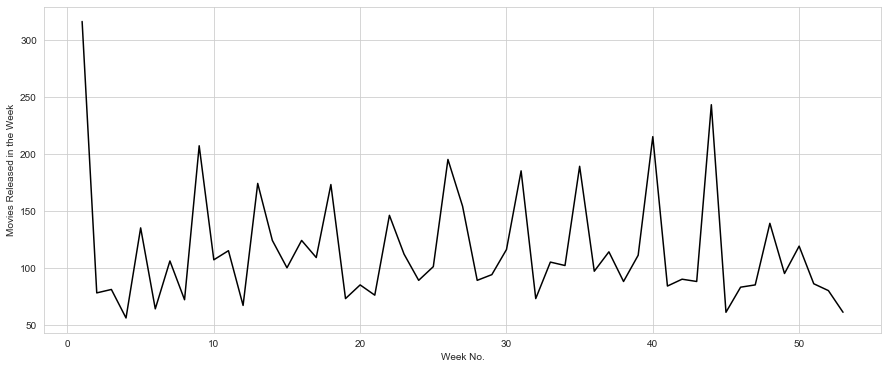

In [253]:
df_week=df_movies.groupby(['week_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,6))
sns.lineplot(data=df_week, x='week_added', y='title',color='black')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

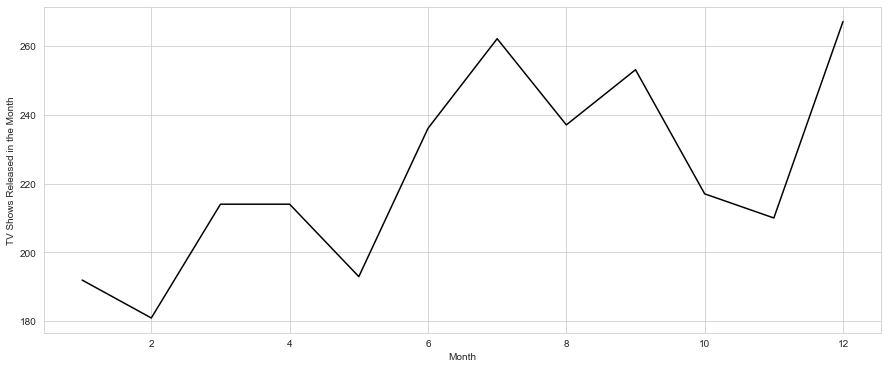

In [254]:
df_month=df_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,6))
sns.lineplot(data=df_month, x='month_added', y='title',color='black')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

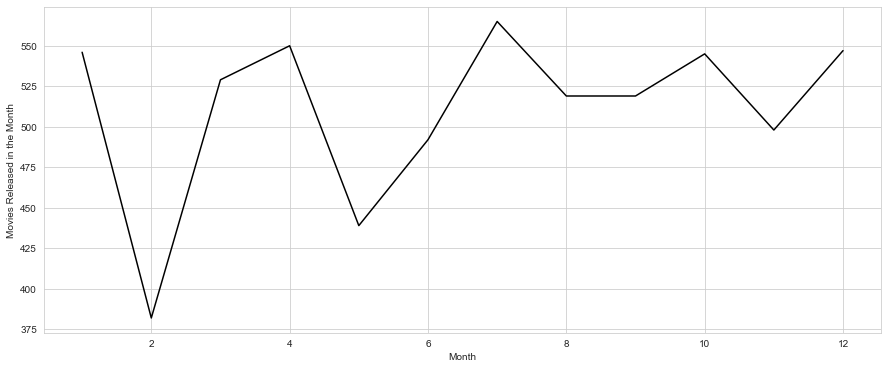

In [255]:
df_month=df_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,6))
sns.lineplot(data=df_month, x='month_added', y='title',color='black')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by a tremendous amount in mid weeks/months of the year, i.e- July

Movies are added in Netflix by a tremendous amount in first week/last month of current year and first month of next year

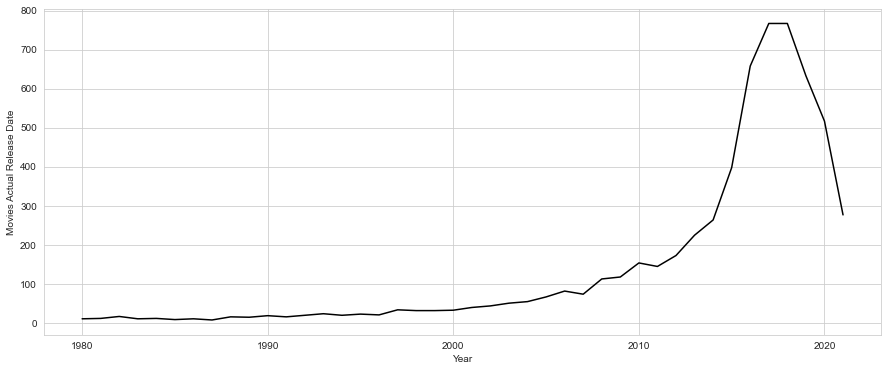

In [256]:
df_release_year=df_movies[df_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,6))
sns.lineplot(data=df_release_year, x='release_year', y='title',color='black')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

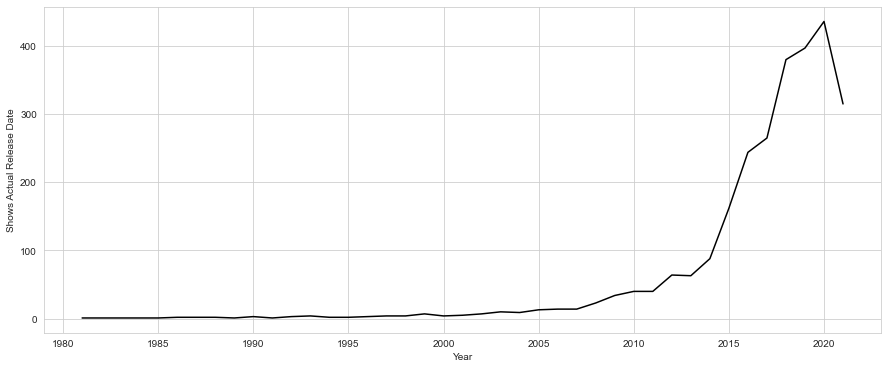

In [257]:
df_release_year=df_shows[df_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,6))
sns.lineplot(data=df_release_year, x='release_year', y='title',color='black')
plt.ylabel("Shows Actual Release Date")
plt.xlabel("Year")
plt.show()

- For both movies and TV shows the amount of content increased till 2019
- In case of TV shows it shapely increased and decresed in very shot period of time and for movies it remained stagnant for some time and then started to decrease 

### Recommendations

- The most popular Genres across the countries and in both TV Shows and Movies are 
Drama, Comedy and International TV Shows/Movies, so content aligning to that 
is recommended.

- Add TV Shows in July/August and Movies in last week of the year/first month of 
the next year.
- Indian artist dominate netflix more than anticipated